In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('CRU_Update.csv')
df.head()

,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter
0,26.25,-122.75,19.161261,1901,1,16,1
1,26.25,-122.25,19.193140,1901,1,16,1
2,26.25,-121.75,18.787348,1901,1,16,1
3,26.25,-121.25,19.009815,1901,1,16,1
4,26.25,-120.75,19.135981,1901,1,16,1


In [4]:
df['year'].value_counts()

1901    19992
1902    19992
1989    19992
1988    19992
1987    19992
        ...  
1936    19992
1935    19992
1934    19992
1933    19992
2020    19992
Name: year, Length: 120, dtype: int64

In [5]:
df.shape

(2399040, 7)

In [15]:
df.rename(columns={'timeseries-tas-monthly-mean': 'temperature'}, inplace=True)

In [16]:
df.isnull().sum()

lat            0
lon            0
temperature    0
year           0
month          0
dayofyear      0
quarter        0
dtype: int64

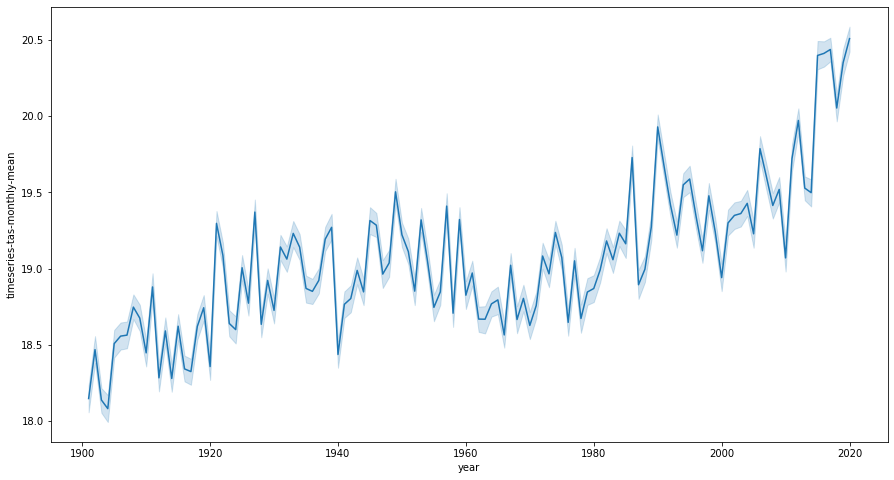

In [9]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='year', y='temperature')
plt.show()

In [17]:
df = df[(df['year'] == 1956) | (df['year'] == 2005)]

means = df.groupby('year')['temperature'].mean()
temp_increase = means.loc[2005] - means.loc[1956]
std_dev = df['temperature'].std()

sem = std_dev / (df['temperature'].count() ** 0.5)

t_value = stats.t.ppf(0.975, df['temperature'].count() - 1)
conf_interval = (temp_increase - t_value * sem, temp_increase + t_value * sem)

print(f"The mean global surface temperature increased by {temp_increase:.2f} ± {t_value * sem:.2f}°C from 1956 to 2005 at a 95% confidence level. (mean ± 95% CI)")

The mean global surface temperature increased by 0.38 ± 0.06°C from 1956 to 2005 at a 95% confidence level. (mean ± 95% CI)
